In [ ]:
# 基于python实现的线性代数

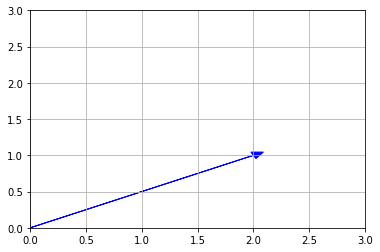

In [1]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

^C


C:\Users\tomis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\cuda\__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


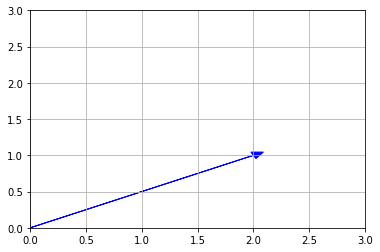

向量相减结果： [ 5 -1]


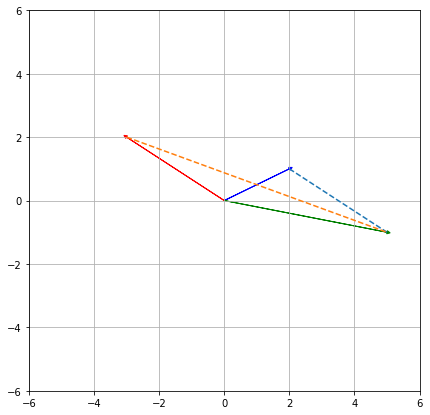

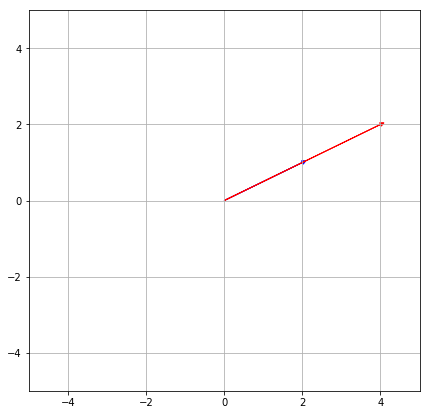

18
18
多维度向量内积结果 [[18 16]
 [12 20]]


7
[ -1 -12   7]


## 线性相关
当且仅当一组向量$ v_1,v_2,v_3...,v_n$ 中任一个向量可以表示为其他向量的线性组合时，称这组向量为线性相关的，否则是线性无关。

应用零向量的概念，线性相关可以定义为：一组m-向量$v_1,v_2,..v_n$ 是线性相关的，当且仅当存在一组标量，$k_1,k_2...k_n$ （不全为0）使得：
   $$ \sum^{n}_{i=1}{k_iv_i}=0 $$
  
  另一方面，如果对所有的$i$，仅当$k_i=0$ 时，上述方程才成立，则这些向量是线性无关的。
 
 > 例如，几何意义上，二维空间线性相关可以表示为两个线性无关向量$ v,u$ 的线性组合
 


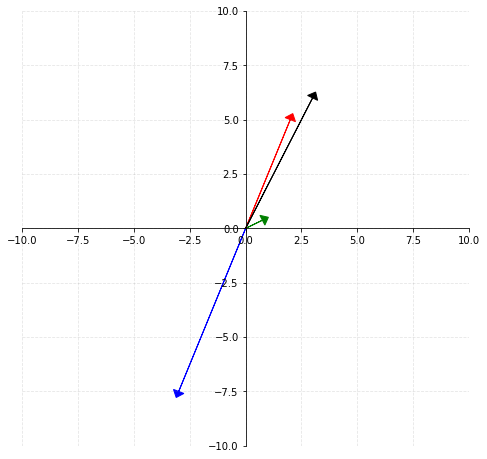

In [2]:
# 线性相关 线性无关的几何表达。
###  
import numpy as np 
import matplotlib.pyplot as plt
#二维空间，线性相关的向量 
u=np.array([2,5])
u2=np.array([3,6])
v=-1.5*u # v为u的线性表达
w=0.75*v+u2
fig3,axes3=plt.subplots()
fig3.set_size_inches(8,8)
axes3.set_xlim(-10,10)
axes3.set_ylim(-10,10)
 
axes3.spines['top'].set_visible(False)
axes3.spines['right'].set_visible(False)
axes3.spines['left'].set_position(('data',0))
axes3.spines['bottom'].set_position(('data',0))
# 为图像添加网格
axes3.grid(color='gray',linestyle='--',alpha=0.2)
 

axes3.arrow(0,0,v[0],v[1],head_length=0.3,head_width=0.5,color='blue',shape='full')
axes3.arrow(0,0,u[0],u[1],head_length=0.3,head_width=0.5,color='red',shape='full')
axes3.arrow(0,0,w[0],w[1],head_length=0.3,head_width=0.5,color='green',shape='full')
axes3.arrow(0,0,u2[0],u2[1],head_length=0.3,head_width=0.5,color='black',shape='full')
plt.show()


u 向量是否是e_x,e_y两个基底的线性组合： [ True  True]
新的坐标上u的投影（cos） 9
1
新的基地构成的二维坐标矩阵： [[ 1  1]
 [-1  1]]
向量u通过与新的二维坐标矩阵内积得到新的坐标下的投影： [9 1]


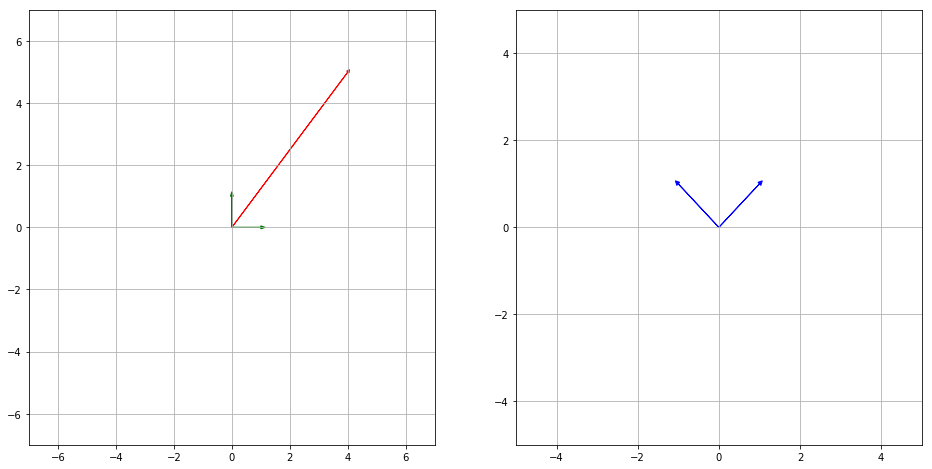

In [3]:
#基底表达
# 默认情况下，e1=[1,0],e2=
import numpy as np 
import matplotlib.pyplot as plt 
fig,axes=plt.subplots(1,2)
fig.set_size_inches(16,8)
u=np.array([4,5])
ax1=axes[0]
ax2=axes[1]
e_x=np.array([1,0])
e_y=np.array([0,1])
ax1.set_xlim(-7,7)
ax1.set_ylim(-7,7)
ax1.grid()
ax1.arrow(0,0,e_x[0],e_x[1],head_width=0.1,color='green')
ax1.arrow(0,0,e_y[0],e_y[1],head_width=0.1,color='green')
ax1.arrow(0,0,u[0],u[1],head_length=0.1,head_width=0.1,color='red')
#新的基底
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.grid()
e_z=np.array([1 ,1])
e_w=np.array([-1  ,1])
ax2.arrow(0,0,e_z[0],e_z[1],head_length=0.1,head_width=0.1,color='blue')
ax2.arrow(0,0,e_w[0],e_w[1],head_length=0.1,head_width=0.1,color='blue')
# 向量u是基底的线性组合
u=np.array([4,5])
u2=4*e_x+5*e_y
print("u 向量是否是e_x,e_y两个基底的线性组合：",u2==u)
print("新的坐标上u的投影（cos）",u@e_z)
print(u@e_w)
# 定义相关的坐标系
new=np.array([e_z,e_w])
print("新的基地构成的二维坐标矩阵：",new)
new_point=new@u
print("向量u通过与新的二维坐标矩阵内积得到新的坐标下的投影：",new_point)

 

# 矩阵

## Introduction to Matrices
In general terms, a matrix is an array of numbers that are arranged into rows and columns.

## Matrices and Matrix Notation
A matrix arranges numbers into rows and columns, like this:

\begin{equation}A = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6
 \end{bmatrix}
\end{equation}

Note that matrices are generally named as a capital letter. We refer to the *elements* of the matrix using the lower case equivalent with a subscript row and column indicator, like this:

\begin{equation}A = \begin{bmatrix}
  a_{1,1} & a_{1,2} & a_{1,3} \\
  a_{2,1} & a_{2,2} & a_{2,3}
 \end{bmatrix}
\end{equation}

In Python, you can define a matrix as a 2-dimensional *numpy.**array***, like this:
python 中可以用两种方式表示矩阵， 

```pyhton 
m=np.matrix([[]])
m=np.array([[]])
```
 
但一般用 np.array([[]])代替矩阵进行运算，因为这不但可以表示二维数组，还能表示多维度数组。


可以将矩阵视为m个堆放在一起的n维向量，也可以将向量视为一个特殊矩阵。
> 张量、阶的概念
在某些情况下，将会讨论超过两维的数组。一般的，一个数组中的元素分布在若干维坐标的规则网格中，我们称之为张量

在深度学习中，向量化是一个非常重要的概念，例如pytorch，tensorflow的基础数据表达都是向量，但其表达上与Numpy有一定的差别，但概念内涵一致。
相关概念包括：
 

* 秩（Rank）：张量轴数。标量的秩为 0，向量的秩为 1，矩阵的秩为 2。
* 形状（Shape）：张量的每个轴的长度（元素数量）。
* 轴或维度（Axis，Dimension）：张量的一个特殊维度。
* 大小（Size）：张量的总项数，即乘积形状向量

| 线性代数中概念 | 深度学习中一般表达| Numpy例子|Tensorflow例子|pytorch例子|轴（阶、秩）的数目|
| -------- | -------- | -------- | -------- | -------- |-------- |
| 标量(Scale)  | “0 秩”张量("rank-0" tensor)   | numpy.array(5)   |tf.constant(5)|troch.tensor(5)|0|
| 向量(Vector)  | “1 秩”张量("rank-1" tensor)   | numpy.array([5,1,1])   |tf.constant([5,1,1,1])|troch.tensor([5,1,1,1])|1|
| 矩阵(Matrix)  | “2 秩”张量("rank-2" tensor)   | numpy.array([[5,1,1]])   |tf.constant([[5,1,1,1]])|troch.tensor([[5,1,1,1]])|2|

> 之前我们学习了向量，实际上$n$维的行向量就可以看作是一个$1 \times n$的特殊矩阵，同理，$n$维的列向量也可以视为一个$ n \times 1$的特殊矩阵。

In [23]:
 # 定义一个矩阵
 import numpy as np 
 m=np.matrix([[1,2,3],[4,5,6],[7,8,9]])
 print("矩阵元素个数：",m.size)
 print("矩阵的轴数：",m.ndim)
 print("矩阵的形状：",m.shape)

矩阵元素个数： 9
矩阵的轴数： 2
矩阵的形状： (3, 3)


### 特殊矩阵
1. Identity Matrices 单位矩阵

An *identity* matrix (usually indicated by a capital **I**) is the equivalent in matrix terms of the number **1**. It always has the same number of rows as columns, and it has the value **1** in the diagonal element positions I<sub>1,1</sub>, I<sub>2,2</sub>, etc; and 0 in all other element positions. Here's an example of a 3x3 identity matrix:

\begin{equation}\begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} \end{equation}

Multiplying any matrix by an identity matrix is the same as multiplying a number by 1; the result is the same as the original value:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \cdot \begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} = \begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \end{equation}

单位矩阵定义为主对角线元素为1，其他元素为0的**方阵**。单位矩阵以符号$I$或$I_n$表示，下标$n$表示其行列数。

单位矩阵很重要，因为其与标量代数中的1起到类似的作用。

同时单位矩阵不论自乘多少次任保持不变
$$(I_n)^k=I_n \quad (k=1,2,...)$$

具有这种性质($AA=A$)的矩阵称为**幂等矩阵** 
 
2. 0 矩阵

零矩阵是一个所有元素均为0的简单矩阵，但是其不一定是方阵，其起到作用与标量0的作用相似，例如。
$$ 0_{(2 \times 2)}= \begin{bmatrix} 0&0\\0&0 \end{bmatrix}$$
$$ 0_{(2 \times 3)}= \begin{bmatrix} 0&0&0\\0&0&0 \end{bmatrix}$$

3. 对称矩阵

矩阵$C_m \times n$中若$c_ij=c_ji$，称为对称矩阵，也即元素关于主对角线对称。


---
 
Numpy 中相关特殊矩阵的创建：
 ```python 
 zero=np.zeros((2,3))# 创建2r3c的0矩阵
 one=np.eye(3)#创建单位矩阵
 one=np.identity(3)#创建单位矩阵


## Matrix Operations
Matrices support common arithmetic operations.

### Adding Matrices
To add two matrices of the same size together, just add the corresponding elements in each matrix:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix}+ \begin{bmatrix}6 & 5 & 4 \\3 & 2 & 1\end{bmatrix} = \begin{bmatrix}7 & 7 & 7 \\7 & 7 & 7\end{bmatrix}\end{equation}

In this example, we're adding two matrices (let's call them ***A*** and ***B***). Each matrix has two rows of three columns (so we describe them as 2x3 matrices). Adding these will create a new matrix of the same dimensions with the values a<sub>1,1</sub> + b<sub>1,1</sub>, a<sub>1,2</sub> + b<sub>1,2</sub>, a<sub>1,3</sub> + b<sub>1,3</sub>,a<sub>2,1</sub> + b<sub>2,1</sub>, a<sub>2,2</sub> + b<sub>2,2</sub>, and a<sub>2,3</sub> + b<sub>2,3</sub>. In this instance, each pair of corresponding elements(1 and 6, 2, and 5, 3 and 4, etc.) adds up to 7.

 ---
 ## Subtracting Matrices
Matrix subtraction works similarly to matrix addition:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix}- \begin{bmatrix}6 & 5 & 4 \\3 & 2 & 1\end{bmatrix} = \begin{bmatrix}-5 & -3 & -1 \\1 & 3 & 5\end{bmatrix}\end{equation}

---
### Negative Matrices
The nagative of a matrix, is just a matrix with the sign of each element reversed:

\begin{equation}C = \begin{bmatrix}-5 & -3 & -1 \\1 & 3 & 5\end{bmatrix}\end{equation}

\begin{equation}-C = \begin{bmatrix}5 & 3 & 1 \\-1 & -3 & -5\end{bmatrix}\end{equation}

---
#### Conformability（矩阵一致性）
In the previous examples, we were able to add and subtract the matrices, because the *operands* (the matrices we are operating on) are ***conformable*** for the specific operation (in this case, addition or subtraction). To be conformable for addition and subtraction, the operands must have the same number of rows and columns. There are different conformability requirements for other operations, such as multiplication; which we'll explore later.

### Matrix Transposition（矩阵转置）
You can *transpose* a matrix, that is switch the orientation of its rows and columns. You indicate this with a superscript **T**, like this:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix}^{T} = \begin{bmatrix}1 & 4\\2 & 5\\3 & 6 \end{bmatrix}\end{equation}

矩阵的转置有如下性质：
* 和的转置为转置的和
$$ (A+B)^T= A^T+B^T $$
* 乘积的转置是转置的乘积，但转置的顺序颠倒
$$ (AB)^T=B^TA^T$$

---

In Python, both *numpy.**array*** and *numpy.**matrix*** have a **T** function:

In [2]:
import numpy as np 
m1=np.arange(0,15,1).reshape(3,5)
m2=m1.T
print("原始矩阵： \n",m1)
print("转置后矩阵: \n",m2)


原始矩阵： 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
转置后矩阵: 
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


### 矩阵乘法
矩阵乘法是矩阵运算中最重要的操作之一，两个矩阵$A(m \times n),B(n \times p)$的矩阵乘积（matrix product）是第三个矩阵$C $。为了使得乘法可以被定义，矩阵$A$ 的烈数$n$必须和矩阵$B$的行数$n$相等，得到的矩阵$C$的形状是$ m \times p$。
$$ C=AB $$
对应具体$C$ 中元素 $C_{i,j}$
$$ C_{i,j}= \sum_k A_{i,k} B_{k,j} $$

>需要注意，两个矩阵的标准乘积不是两个矩阵中对应元素的乘积，但这样的操作存在，即元素对应乘积(element-wise product)或者Hadamard乘积，记为
$ A \odot B$

结合向量内积概念，以及矩阵是多个向量的组合，可以将矩阵乘积$C=AB$的元素$c_{i,j}$简单地描述为前一个矩阵$A$的第$i$行与后一个矩阵B中的第$j$列的**内积** 。反之，可以将两个相同维数的向量$x,y$的内积，视为第一个向量与第二个向量转置后的矩阵乘积 $xy^T$。

相关定律：
* 矩阵乘法不满足交换律（标量除外）： $AB \neq\; BA $
* 矩阵乘法满足结合律： $ (AB)C=A(BC)=ABC $
* 矩阵乘法满足分配率： $A(B+C)=AB+AC; (B+C)A=BA+VA $


---
Numpy中，矩阵的乘法依据创建矩阵的方式不同：

1. 若使用np.array([[]])方式创建矩阵A,B则：

``` python
C=np.dot(A,B)#矩阵乘积
m=A*B#A,B 矩阵的shape相同，得到对应元素乘积（Hadamard乘积）
```
2. 使用matrix创建的矩阵
```python
A=np.mat()
B=np.mat()
C=A*B#矩阵乘积直接使用 * 
m=np.multiply(A,B)# 同型矩阵对应元素乘积使用np.multiply()
```


In [3]:
import numpy as np 
A=np.arange(0,15,1).reshape(3,5)
B=np.arange(16,31,1).reshape(5,3)
print('矩阵A：','\n',A,'\n','矩阵B：',B)
print("矩阵1形状：",A.shape,"矩阵2形状：",B.shape)
C=np.dot(A,B)
print("矩阵乘积：",'\n',C)
print("矩阵乘积形状:",C.shape)
A_r1=A[0,:]
B_c1=B[:,0]
C_11=np.dot(A_r1,B_c1)
print("C中对应元素ij为A的i行向量与B的j列向量内积:",C_11)

A2=A.reshape(5,3)
print("如果是求对应元素的乘积，那么A，B矩阵的形状必须相同 \n")
C2=A2*B
print("A2，B矩阵对应元素乘积：",C2)

v1=np.array([1,2,3,4,5])
v2=np.array([2,3,4,5,6])
v3=np.dot(v1,v2)
print("两个向量的dot得到一个标量：",v3)
m1=np.array([[1,2,3,4,5]])
m2=np.array([[2,3,4,5,6]])
m3=np.dot(m1,m2.T)
print("两个向量对应矩阵的乘积，转换为第一个矩阵与第二个矩阵转置的dot，得到一个矩阵：",m3)

矩阵A： 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 
 矩阵B： [[16 17 18]
 [19 20 21]
 [22 23 24]
 [25 26 27]
 [28 29 30]]
矩阵1形状： (3, 5) 矩阵2形状： (5, 3)
矩阵乘积： 
 [[ 250  260  270]
 [ 800  835  870]
 [1350 1410 1470]]
矩阵乘积形状: (3, 3)
C中对应元素ij为A的i行向量与B的j列向量内积: 250
如果是求对应元素的乘积，那么A，B矩阵的形状必须相同 

A2，B矩阵对应元素乘积： [[  0  17  36]
 [ 57  80 105]
 [132 161 192]
 [225 260 297]
 [336 377 420]]
两个向量的dot得到一个标量： 70
两个向量对应矩阵的乘积，转换为第一个矩阵与第二个矩阵转置的dot，得到一个矩阵： [[70]]


课堂作业：

定义两个矩阵
$$ A= \begin{bmatrix}2&6&7&5 & 5\\ 9 &8 &7 &9 &2 \end{bmatrix} 
B=\begin{bmatrix} 3&7&9&3&9 \\ 8&6&5&5&3 \end{bmatrix}$$
分别计算：
1. $A-B$
2.$A+B$
3.$A\dot B,B \dot A$
4.$A \odot B$
使用numpy首先判断以上计算能否实现，为什么？

5. $AB^T$


In [11]:
import numpy as np 
A=np.array([[2,6,7,5,5],[9,8,7,9,2]])
print(A)
print(A.ndim)
print(A.shape)

B=np.array([[3,7,9,3,9],[8,6,5,5,3]])
print(B)
print(B.ndim)
print(B.shape)
C1=A-B
print(C1)
C2=A+B
print(C2)
C3=A*B
print(C3)
#C4_1=A.dot(B)
C5=A.dot(B.T)
print(C5)
print(C5.shape)

[[2 6 7 5 5]
 [9 8 7 9 2]]
2
(2, 5)
[[3 7 9 3 9]
 [8 6 5 5 3]]
2
(2, 5)
[[-1 -1 -2  2 -4]
 [ 1  2  2  4 -1]]
[[ 5 13 16  8 14]
 [17 14 12 14  5]]
[[ 6 42 63 15 45]
 [72 48 35 45  6]]
[[171 127]
 [191 206]]
(2, 2)


In [4]:
import numpy as np
d1=np.mat([[1,2],[3,4],[5,6]])
d2=np.mat([[1,2],[3,4]])
print(d1*d2)
d3=np.array([[1,2],[3,4],[5,6]])
d4=np.array([[1,2],[3,4],[7,9]])
print(np.multiply(d3,d4))

[[ 7 10]
 [15 22]
 [23 34]]
[[ 1  4]
 [ 9 16]
 [35 54]]


(2,)
原有向量空间表达：
矩阵A的形状： (3, 2)
[13 19 15]


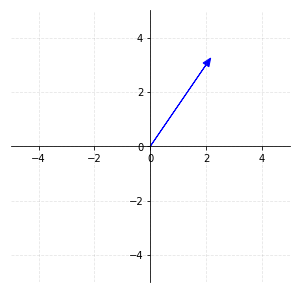

In [2]:
import numpy as np 
import matplotlib.pyplot as plt


## Matrix Division 矩阵除法（矩阵的逆）
You can't actually divide by a matrix; but when you want to divide matrices, you can take advantage of the fact that division by a given number is the same as multiplication by the reciprocal of that number. For example:

\begin{equation}6 \div 3 = \frac{1}{3}\times 6 \end{equation}

In this case, <sup>1</sup>/<sub>3</sub> is the reciprocal of 3 (which as a fraction is <sup>3</sup>/<sub>1</sub> - we "flip" the numerator and denominator to get the reciprocal). You can also write <sup>1</sup>/<sub>3</sub> as 3<sup>-1</sup>.

### Inverse of a Matrix
For matrix division, we use a related idea; we multiply by the *inverse* of a matrix:

\begin{equation}A \div B = A \cdot B^{-1}\end{equation}

The inverse of B is B<sup>-1</sup> as long as the following equation is true:

\begin{equation}B \cdot B^{-1} = B^{-1} \cdot B = I\end{equation}

**I**, you may recall, is an *identity* matrix; the matrix equivalent of 1.

So how do you calculate the inverse of a matrix? For a 2x2 matrix, you can follow this formula:

\begin{equation}\begin{bmatrix}a & b\\c & d\end{bmatrix}^{-1} = \frac{1}{ad-bc}  \begin{bmatrix}d & -b\\-c & a\end{bmatrix}\end{equation}

What happened there?
- We swapped the positions of *a* and *d*
- We changed the signs of *b* and *c*
- We multiplied the resulting matrix by 1 over the *determinant* of the matrix (*ad-bc*)

Let's try with some actual numbers:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} = \frac{1}{(6\times2)-(2\times1)}  \begin{bmatrix}2 & -2\\-1 & 6\end{bmatrix}\end{equation}

So:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} = \frac{1}{10}  \begin{bmatrix}2 & -2\\-1 & 6\end{bmatrix}\end{equation}

Which gives us the result:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} = \begin{bmatrix}0.2 & -0.2\\-0.1 & 0.6\end{bmatrix}\end{equation}

To check this, we can multiply the original matrix by its inverse to see if we get an identity matrix. This makes sense if you think about it; in the same way that 3 x <sup>1</sup>/<sub>3</sub> = 1, a matrix multiplied by its inverse results in an identity matrix:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}0.2 & -0.2\\-0.1 & 0.6\end{bmatrix} = \begin{bmatrix}(6\times0.2)+(2\times-0.1) & (6\times-0.2)+(2\times0.6)\\(1\times0.2)+(2\times-0.1) & (1\times-0.2)+(2\times0.6)\end{bmatrix} = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}\end{equation}

Note that not every matrix has an inverse - for example, if the determinant works out to be 0, the inverse matrix is not defined.

矩阵$A$的逆矩阵$A^{-1}$，可能存在也可能不存在，其满足：

\begin{equation}A \cdot A^{-1} = A^{-1} \cdot A = I\end{equation}
矩阵的逆还有如下性质：
*  并非每一个方阵都有逆矩阵，方阵是逆矩阵存在的必要条件，但非充分条件。若方阵$A$有逆矩阵，则$A$称为**非奇异矩阵**，否则称为**奇异矩阵**。
* 若逆矩阵存在，则它是唯一的。
* 逆矩阵的逆就是原矩阵：$(A^{-1})^{-1}=A$
* 乘积的逆矩阵等于逆矩阵的乘积：$(A \cdot B)^{-1}=B^{-1} \cdot A^{-1}$
* 转置的逆矩阵等于逆的转置：$(A^T)^{-1}=(A^{-1})^T$


---

In Python, you can use the *numpy.linalg.**inv*** function to get the inverse of a matrix in an *array* or *matrix* object:

```python
B=np.linalg.inv(A)# 对于通过array构建的矩阵使用inv方法
C=B.I#对于通过matrix构建的矩阵使用.I 得到
```

In [6]:
import numpy as np 
A=np.array([[3,1],[0,2]])
B=np.linalg.inv(A)
print(B)
print(A.dot(B))
print(B.dot(A))
#使用matrix构建的矩阵的逆
D=np.mat([[3,1],[0,2]])
E=D.I
print(E)

[[ 0.33333333 -0.16666667]
 [ 0.          0.5       ]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]
[[ 0.33333333 -0.16666667]
 [ 0.          0.5       ]]


### Solving Systems of Equations with Matrices 通过矩阵解线性方程组
One of the great things about matrices, is that they can help us solve systems of equations. For example, consider the following system of equations:

\begin{equation}2x + 4y = 18\end{equation}
\begin{equation}6x + 2y = 34\end{equation}

We can write this in matrix form, like this:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix} \cdot \begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Note that the variables (***x*** and ***y***) are  arranged as a column in one matrix, which is multiplied by a matrix containing the coefficients to produce as matrix containing the results. If you calculate the dot product on the left side, you can see clearly that this represents the original equations:

\begin{equation}\begin{bmatrix}2x + 4y\\6x + 2y\end{bmatrix} =\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Now. let's name our matrices so we can better understand what comes next:

\begin{equation}A=\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}\;\;\;\;X=\begin{bmatrix}x\\y\end{bmatrix}\;\;\;\;B=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

We already know that ***A &bull; X = B***, which arithmetically means that ***X = B &div; A***. Since we can't actually divide by a matrix, we need to multiply by the inverse; so we can find the values for our variables (*X*) like this: ***X = A<sup>-1</sup> &bull; B***

So, first we need the inverse of A:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}^{-1} = \frac{1}{(2\times2)-(4\times6)}  \begin{bmatrix}2 & -4\\-6 & 2\end{bmatrix}\end{equation}

\begin{equation}= \frac{1}{-20}  \begin{bmatrix}2 & -4\\-6 & 2\end{bmatrix}\end{equation}

\begin{equation}=\begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix}\end{equation}

Then we just multiply this with B:

\begin{equation}X = \begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix} \cdot \begin{bmatrix}18\\34\end{bmatrix}\end{equation}

\begin{equation}X = \begin{bmatrix}(-0.1 \times 18)+(0.2 \times 34)\\(0.3\times18)+(-0.1\times34)\end{bmatrix}\end{equation}

\begin{equation}X = \begin{bmatrix}5\\2\end{bmatrix}\end{equation}

The resulting matrix (*X*) contains the values for our *x* and *y* variables, and we can check these by plugging them into the original equations:

\begin{equation}(2\times5) + (4\times2) = 18\end{equation}
\begin{equation}(6\times5) + (2\times2) = 34\end{equation}

These of course simplify to:

\begin{equation}10 + 8 = 18\end{equation}
\begin{equation}30 + 4 = 34\end{equation}

So our variable values are correct.


在空间上，可以将方程组中每一个方程视为一条空间中的向量$ v_n =\{v_1,v_2,...,v_n\}$，那么空间中的向量关系存在以下情况
* 各个向量相交与一点，得到一个解集,即对应空间 $R^n$上的一个点
* 若各个系数向量平行，则无解
* 若各个系数向量重合，则有无穷多解


---
Numpy中也可以直接用np.linalg.slove(A,b)来求方程的解x，其中
：A 为系数矩阵,b为常数向量矩阵，x为解向量即：
```python
import numpy as np

Ab=x
x=np.linalg.slove(A,b)
```




*** 注意 ***
>numpy 只可以解形为方阵的非奇异矩阵，但 Sympy中的solve可以解任意系数矩阵的线性方程组。

使用sympy.solve函数解方程，该函数通常传入两个参数，第1个参数是方程的表达式（把方程所有的项移到等号的同一边形成的式子），第2个参数是方程中的未知数。函数的返回值是一个列表，代表方程的所有根（可能为复数根）。与numpy不同的是，在sympy中，需要定义变量->定义等式->然后进行计算。

得到的结果为字典类型。

 


In [6]:
import numpy as np 

A=np.array([[7,-1,-1],[10,-2,1],[6,3,-2]])

print("系数矩阵为： \n",A)
B=np.linalg.inv(A)
print("A的逆矩阵为：",B)
b=np.array([[0,8,7]]).T#注意需要使用列向量
x=np.dot(B,b)
print("常数向量为: \n",b)
#x=np.linalg.solve(A,b)
print("解为：",x)
x2=np.linalg.solve(A,b)
print("通过slove方法求解： \n",x2)



系数矩阵为： 
 [[ 7 -1 -1]
 [10 -2  1]
 [ 6  3 -2]]
A的逆矩阵为： [[-0.01639344  0.08196721  0.04918033]
 [-0.42622951  0.13114754  0.27868852]
 [-0.68852459  0.44262295  0.06557377]]
常数向量为: 
 [[0]
 [8]
 [7]]
解为： [[1.]
 [3.]
 [4.]]
通过slove方法求解： 
 [[1.]
 [3.]
 [4.]]


In [2]:
!pip install sympy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 KB 2.8 MB/s eta 0:00:0000:0100:01


In [3]:
####sympy解非奇异方程组###
from sympy import *
x1,x2,x3=symbols("x1,x2,x3")# 定义变量
eq=[7*x1-x2-x3-0,10*x1-2*x2+x3-8,6*x1+3*x2-2*x3-7]#定义线性方程组，常数项移左
rs=solve(eq,[x1,x2,x3])
print(rs)
#### 解非方阵###
import numpy as np
A=np.array([[2,-3,1,5],[-3,1,2,-4],[-1,-2,3,1]])
print(A.shape)
A_rank=np.linalg.matrix_rank(A)
print(A_rank)
b=np.array([6,5,11]).T 
#np.linalg.solve(A,b) 

A2=np.array([[1,2,3,4],[1,3,5,7]])
print("目标空间维度:",A2.shape[0])
 
print("系数矩阵值秩",np.linalg.matrix_rank(A2))





{x1: 1, x2: 3, x3: 4}
(3, 4)
2
目标空间维度: 2
系数矩阵值秩 2


## 矩阵的非奇异性
由上可知，方程有解那么其对应的系数矩阵必须可逆，或者说对应向量能够通过对应的矩阵坐标得到新的空间投影，前提是对应矩阵可逆，也即该矩阵为非奇异矩阵。

1. 当矩阵$A$为方阵（从线性方程角度，即方程个数与未知数$x$个数相同）时，才可能有你矩阵（即可能是非奇异的），但这并不是充分条件。
2. 从线性方程的角度，方程组有唯一解的唯一可能是系数矩阵$A$的行或列线性无关。

方正条件和线性无关条件结合在一起，构成了非奇异矩阵的充分必要条件。

> 非奇异性 $\leftrightarrow$ 方阵且线性无关

进一步，一组线性方程有唯一解的唯一可能是系数矩阵$A$的行或列线性无关，在此情况下，$A$为非奇异矩阵，这意味着$A^{-1}$确实存在。且***唯一解$x=A^{-1}d$可求***

### 矩阵的秩

线性无关的概念也可以使用与任意的$m \times n$矩阵，而不一定是方阵。在一个矩阵中，若线性无关的最大行数为$r$，则称该矩阵的秩为$r$（秩也告诉我们该矩阵线性无关最大的列数）。$m \times n$矩阵的秩的最大值等于$m,n$中较小的一个。即：
$$ r(A) \leqslant min\{m,n \}$$
> 矩阵可以看作是一个行向量组或列向量组，矩阵的秩就是矩阵的行向量组或列向组的极大线性无关组中所含向量的个数，也可以理解为**矩阵的秩就是有价值的内容数目**（全为0的向量没有价值内容）。

### 行列式
在线性代数中，行列式是基本的数学工具。其是一个算式，经过计算后就是数。行列式主要用于判读矩阵是否可逆，以及计算特征方程。

* 行列式与矩阵的区别



| 行列式| 矩阵 |  
| -------- | -------- |  
| $\quad \begin{vmatrix} a_{11} & a_{12} & ... &a_{1n} \\
..& .. & .. ... \\
a_{11} & a_{12} & ... &a_{m \times n} \\
\end{vmatrix} \quad = \sum_{j_1j_2..j_n} (-1)^ta_{1j_1}...a_{nj_n}  $   |   $\quad \begin{bmatrix} a_{11} & a_{12} & ... &a_{1n} \\
..& .. & .. ... \\
a_{11} & a_{12} & ... &a_{m \times n} \\
\end{bmatrix} \quad   $   |  
| 行数等于列数    | 行列数可以不等     |  
| 共有$n^2$个元素   | 共有$ m  \times n $个元素     |
| 本质为一个数值    | 本质为一组向量     | 


#### 线性方程组-齐次方程、增广矩阵
在秩等概念的基础上，我们进一步回顾线性方程组中的其他概念。

* （非）齐次方程

考虑方程组:$Ax=b$其中若常数项向量 $b=0$即$b_1=b_2=b_3=b_n=0$那么方程组变为：$$ Ax=0$$
其中0为0向量，这种特殊的情况称为齐次方程组。

又由设$A$为非奇异矩阵，$x=A^{-1} \times 0 \rightarrow x=0$故可以得到：
> 若$A$为非奇异矩阵，齐次方程组仅等得到一个0解，也可以理解为0向量在新的坐标投影依然是0向量。

---
* python 中相关的代码为

``` python
rank=np.linalg.matrix_rank(A)#求矩阵的秩
deter=np.linalg.det(A)#求矩阵对应的行列式的值

```
* 总结线性方程组的结果



| 对应方程组$Ax=b$ $A$为 $n \times n$方阵| $b\neq 0$ 非齐次方程组 | $b= 0$ 齐次方程组   |
| -------- | -------- | -------- |
| $|A| \neq 0$或 $r(A)=n$ $A$系数矩阵为非奇异矩阵    | 存在唯一的非0解向量 $x \neq 0$     | 存在唯一的0解向量 $x = 0$     |
| $|A| = 0$或 $r(A)<n$ $A$系数矩阵为奇异矩阵-方程相容    | 存在无数个解（不包括0解）     | 存在无数个解（包括0解）   |
| $|A| = 0$或 $r(A)<n$ $A$系数矩阵为奇异矩阵-方程不相容    | 无解     | 不可能出现   |

> 线性方程组解数目的空间解释

空间中$Ax=b$代表$x$向量通过列空间$A$ 的转换，得到$b$解向量，当且经当向量$b$在$A$的列空间中时，方程组才有解。






----
例题：分别通过矩阵的秩，与矩阵行列式计算矩阵是否为奇异矩阵，并通过行列式判读下列方程是否有唯一解,并解出。
$$\begin{align} 7x_1-3x_2-3x_3=7 \end{align} $$

In [ ]:
import numpy as np 
ar=np.array([[8,-1,0],[0,2,5],[2,0,3]])
b=np.array([16,5,7]).T
print("系数矩阵为： \n",ar)
print("常数向量为： \n",b)
print(ar.shape)
print("矩阵是否是方阵：",ar.shape[0]==ar.shape[1])
rank=np.linalg.matrix_rank(ar)
print("矩阵的秩为：",rank)
print("矩阵的行列数为:",ar.shape[0])
print("矩阵的秩与行列数是否相等：",rank==ar.shape[0])
determinant=np.linalg.det(ar)
print("行列式的值为",determinant)
print("行列式的值是否等于0：",determinant==0)
if determinant==0:
    print("判断为奇异矩阵")

else:
    print("判断为非奇异矩阵")
    A2=np.linalg.inv(ar)
    print("求得系数矩阵的逆为： \n",A2)
    x=A2@b
    print("求得解向量为：",np.around(x))

## 线性变换、 特征向量、 特征值Transformations, Eigenvectors, and Eigenvalues


Matrices and vectors are used together to manipulate spatial dimensions. This has a lot of applications, including the mathematical generation of 3D computer graphics, geometric modeling, and the training and optimization of machine learning algorithms. We're not going to cover the subject exhaustively here; but we'll focus on a few key concepts that are useful to know when you plan to work with machine learning.

### Linear Transformations 线性变换
You can manipulate a vector by multiplying it with a matrix. The matrix acts a function that operates on an input vector to produce a vector output. Specifically, matrix multiplications of vectors are *linear transformations* that transform the input vector into the output vector.

For example, consider this matrix ***A*** and vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

We can define a transformation ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

To perform this transformation, we simply calculate the dot product by applying the *RC* rule; multiplying each row of the matrix by the single column of the vector:

$$\begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\end{bmatrix}$$

In this case, both the input vector and the output vector have 2 components - in other words, the transformation takes a 2-dimensional vector and produces a new 2-dimensional vector; which we can indicate like this:

$$ T: \rm I\!R^{2} \to \rm I\!R^{2} $$

Note that the output vector may have a different number of dimensions from the input vector; so the matrix function might transform the vector from one space to another - or in notation, ${\rm I\!R}$<sup>n</sup> -> ${\rm I\!R}$<sup>m</sup>.

For example, let's redefine matrix ***A***, while retaining our original definition of vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

Now if we once again define ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

We apply the transformation like this:

$$\begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\\3\end{bmatrix}$$

So now, our transformation transforms the vector from 2-dimensional space to 3-dimensional space:

$$ T: \rm I\!R^{2} \to \rm I\!R^{3} $$

---

## Transformations of Magnitude and Amplitude

When you multiply a vector by a matrix, you transform it in at least one of the following two ways:
* Scale the length (*magnitude*) of the matrix to make it longer or shorter
* Change the direction (*amplitude*) of the matrix

For example consider the following matrix and vector:

$$ A = \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\0\end{bmatrix}$$

As before, we transform the vector ***v*** by multiplying it with the matrix ***A***:

\begin{equation}\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}\end{equation}

In this case, the resulting vector has changed in length (*magnitude*), but has not changed its direction (*amplitude*).

---

### 矩阵、矩阵与向量相乘的空间解释

矩阵与相连相乘，可以理解为向量$x$和向量$b$的一种映射关系，矩阵$A$是描述这种关系的参数，可看作线性变换。

从空间上看，向量$x$在指定矩阵$A$的作用下，原始空间的向量$x$被转换到了目标空间的新坐标，向量空间的位置由此发生了改变，甚至在映射之后，目标空间的维数相较于原始空间都可能发送改变。

***空间上，矩阵的本质就是映射，矩阵与向量的乘法，本质上可以看作对向量基底的一种改变。***

这种改变不但包括向量大小的改变，更重要的是，其还改变了向量的维度。

由于$A_{m \times n} * v_{n \times 1}=u_{m \times 1}$
根据与向量相乘矩阵$A_{m \times n}$中$m,n$大小关系不同，可以分为以下情况：
$$ \begin{cases}m>n \quad 最终得到向量u维度m大于原有维度n（提维）\\ m<n \quad 最终得到向量u维度m小于原有维度n（降维压缩）\\m=n \quad 最终得到向量u维度m等于原有维度n\end {cases}$$




 
 
 
 
 
 
 
 

 








(2,)
原有向量空间表达：
矩阵A的形状： (3, 2)
经过与矩阵A乘积后的新向量： [13 19 15]


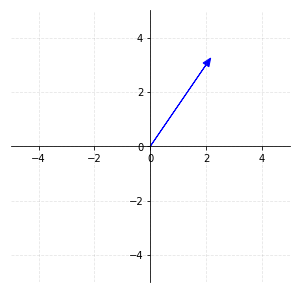

In [4]:
### 矩阵与向量相乘###
import numpy as np 
import matplotlib.pyplot as plt 
#原始x为二维空间向量
x=np.array([2,3]).T
print(x.shape)
### 通过设置spines，将上面的sin图进行修饰
fig3,axes3=plt.subplots()
fig3.set_size_inches(5,5)
axes3.set_xlim(-5,5)
axes3.set_ylim(-5,5)
 
axes3.spines['top'].set_visible(False)
axes3.spines['right'].set_visible(False)
axes3.spines['left'].set_position(('data',0))
axes3.spines['bottom'].set_position(('data',0))
# 为图像添加网格
axes3.grid(color='gray',linestyle='--',alpha=0.2)
 

axes3.arrow(0,0,x[0],x[1],width=0,shape='full',head_width=0.25,head_length=0.3,color='blue')
print("原有向量空间表达：")

A=np.array([[2,3],[2,5],[6,1]])
print("矩阵A的形状：",A.shape)
b=np.dot(A,x)
print("经过与矩阵A乘积后的新向量：",b)
plt.show()

## 向量空间
 
 两个线性无关的向量 $ u,v$ 的各种线性组合生成的所有2维向量的全体称为2维向量空间。
 
 >张成空间:
 >进一步扩展，对于一组线性无关向量，由他们所有线性组合所构成的空间就称为这组向量所**张成** 的空间。
 
 >基：当一组线性无关向量张成了一个空间时，也可以说这一组向量构成了该空间的某一个**基** ,例如
 $$ e_1= \begin{bmatrix} 1\\0\\0 \end{bmatrix}, e_2=\begin{bmatrix} 0\\1\\0 \end{bmatrix},e_3=\begin{bmatrix} 0\\0\\1 \end{bmatrix}$$
 就构成了三维空间$ R^3$ 的一个单位基向量。实际上，n-空间可以由全部线性无关的n个单位相连全体构成。
 
 * 如果二维空间两个向量 $v,u$ 线性相关，那么两个向量就在一条直线上。
 * 如果三维空间三个向量线性相关，$ v,u,w $ 也意味这有个向量可以被其他向量线性表达，例如 $ w=av+bu $ 那么3个向量构成了一个平面，或直接退化成一条直线。
 


### 基
 定义：全称是基底向量。不共线的向量$e_1,e_2,...,e_n$可做这对应$n$维空间所有向量的一组基底。
 
在向量空间中，各个向量可以用基底的线性组合进行表达，从而构成对应的空间。不同的基底实际上
例如$e_1= \begin{bmatrix} 1 \\ 0 \end{bmatrix} \quad , e_2= \begin{bmatrix} 0 \\1 \end{bmatrix}$构成了二维空间的一个基底，该空间中任何向量（包括0向量）都可以是该基底的线性表达，例如 $u=\begin{bmatrix} 2 \\6 \end{bmatrix} =2 \times e_1 +6 \times e_2$。

我们可以根据需要选择新的基底，例如$e_z=[1,1],e_w=[-1,-1]$，则之前的向量$u$可以用新的基底进行表达，即得到新的基底上的新坐标。

但是并不是所有的向量都能够构成$R^m$空间的基底，其必须满足以下条件：
1. 向量的数量必须满足，例如构成$R^m$基底的向量本身的维度必须为$m$维，基向量的个数也必须为$m$个，否则无法表达$m$维空间，也就是对应的基向量矩阵应为$m \times m$方阵。
2. 基向量必须线性无关，若$m$维的基向量线性相关，那么其中一个基向量可为其他向量的线性组合，则无法表达$m$维空间，将会退化成$R^{m-n}$维度的空间，其中$n$为可被其他向量表达的向量个数。

### 标准正交基



### 空间相交 

### 子空间
1. 子空间必须包含母空间0向量
2. 子空间满足加法率，即$v,u$为子空间中向量，那么$w=v+u$得到的$w$向量也一定在子空间中。
3. 子空间满足乘法率，即$v$为子空间中向量，那么$kv$与标量$k$的乘法得到向量也一定在子空间中。

### 0空间



 

 

u 向量是否是e_x,e_y两个基底的线性组合： [ True  True]
新的坐标上u的投影（cos） 9
1
新的基地构成的二维坐标矩阵： [[ 1  1]
 [-1  1]]
向量u通过与新的二维坐标矩阵内积得到新的坐标下的投影： [9 1]


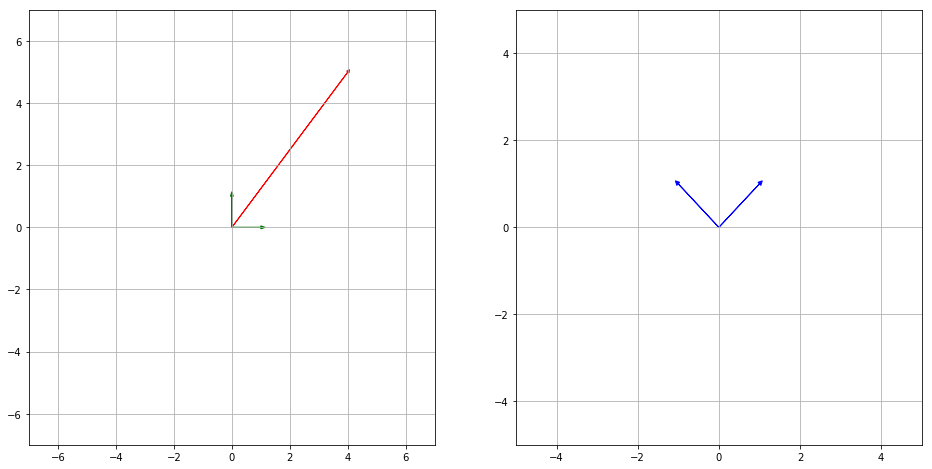

In [3]:
####基底，以及新的基底变换####
import numpy as np 
import matplotlib.pyplot as plt 
fig,axes=plt.subplots(1,2)
fig.set_size_inches(16,8)
u=np.array([4,5])
ax1=axes[0]
ax2=axes[1]
e_x=np.array([1,0])
e_y=np.array([0,1])
ax1.set_xlim(-7,7)
ax1.set_ylim(-7,7)
ax1.grid()
ax1.arrow(0,0,e_x[0],e_x[1],head_width=0.1,color='green')
ax1.arrow(0,0,e_y[0],e_y[1],head_width=0.1,color='green')
ax1.arrow(0,0,u[0],u[1],head_length=0.1,head_width=0.1,color='red')
#新的基底
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.grid()
e_z=np.array([1 ,1])
e_w=np.array([-1  ,1])
ax2.arrow(0,0,e_z[0],e_z[1],head_length=0.1,head_width=0.1,color='blue')
ax2.arrow(0,0,e_w[0],e_w[1],head_length=0.1,head_width=0.1,color='blue')
# 向量u是基底的线性组合
u=np.array([4,5])
u2=4*e_x+5*e_y
print("u 向量是否是e_x,e_y两个基底的线性组合：",u2==u)
print("新的坐标上u的投影（cos）",u@e_z)
print(u@e_w)
# 定义相关的坐标系
new=np.array([e_z,e_w])
print("新的基地构成的二维坐标矩阵：",new)
new_point=new@u
print("向量u通过与新的二维坐标矩阵内积得到新的坐标下的投影：",new_point)

[[0.5 0.4 0.2]
 [0.2 0.3 0.1]
 [0.1 0.1 0.3]]
[226. 119.  78.]


# 线性代数应用